In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 43s 0us/step


2024-12-27 16:44:24.060439: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-27 16:44:24.060497: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-27 16:44:24.060504: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-27 16:44:24.060662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-27 16:44:24.060671: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2024-12-27 16:44:31.325002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 1716s 2s/step - accuracy: 0.0554 - loss: 5.0221
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4847s 6s/step - accuracy: 0.1276 - loss: 4.1937
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 675s 863ms/step - accuracy: 0.1607 - loss: 4.0293
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 826s 1s/step - accuracy: 0.1769 - loss: 3.8754
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 772s 986ms/step - accuracy: 0.1822 - loss: 3.7586


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 792s 1s/step - accuracy: 0.1335 - loss: 3.8909 - val_accuracy: 0.1881 - val_loss: 3.9734
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 744s 951ms/step - accuracy: 0.2060 - loss: 3.4471 - val_accuracy: 0.2068 - val_loss: 3.3512
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 739s 945ms/step - accuracy: 0.2393 - loss: 3.2379 - val_accuracy: 0.1960 - val_loss: 3.4175
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 739s 945ms/step - accuracy: 0.1980 - loss: 3.4739 - val_accuracy: 0.2204 - val_loss: 3.6145
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 744s 952ms/step - accuracy: 0.2724 - loss: 3.0227 - val_accuracy: 0.2512 - val_loss: 3.0683


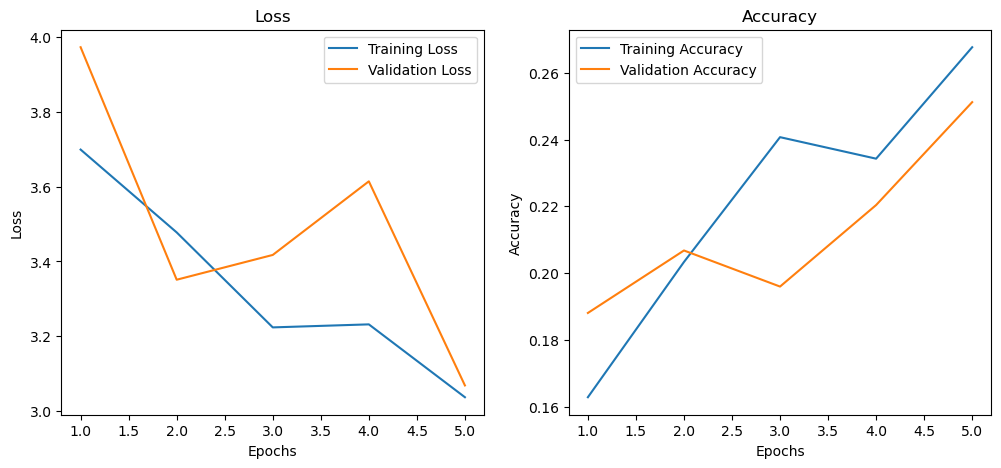

313/313 - 10s - 31ms/step - accuracy: 0.2512 - loss: 3.0683
Test Loss: 3.068268060684204
Test Accuracy: 0.25119999051094055
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step


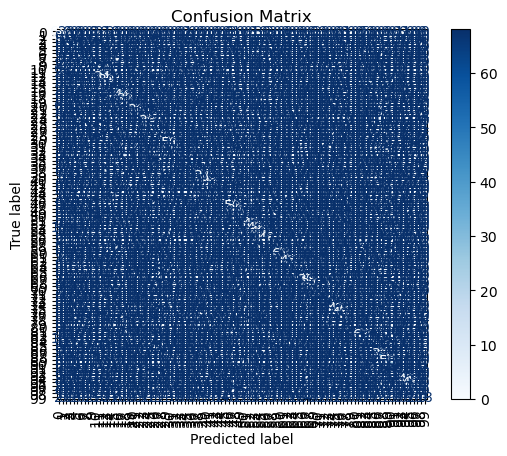

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the history object from training
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Plot training loss and accuracy
def plot_training(history):
    epochs = range(1, len(history.history['loss']) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training(history)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = y_test.flatten()  # Flatten y_test to match predictions

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(100))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()
